In [2]:
import itertools
import pandas as pd
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

%matplotlib inline

In [3]:
data = sio.loadmat('DadosLista4.mat')

### Obtendo dados e label

In [4]:
X = data['Dados']
y = data['y'].reshape(1,-1)[0]

### Separando em treino e teste

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=4, stratify=y)

##### Validando os valores e a seleção aleatória de maneira igualitária no conjunto de treino

In [6]:
unique, counts = np.unique(y_train, return_counts=True)
print("Valores de label: {}".format(unique))

Valores de label: [ 1.  2.  3.]


In [7]:
print("Contagem de cada valor: {}".format(counts))

Contagem de cada valor: [200 200 200]


##### Validando os valores e a seleção aleatória de maneira igualitária no conjunto de teste

In [8]:
unique, counts = np.unique(y_test, return_counts=True)
print("Valores de label: {}".format(unique))

Valores de label: [ 1.  2.  3.]


In [9]:
print("Contagem de cada valor: {}".format(counts))

Contagem de cada valor: [300 300 300]


In [25]:
### Função de plot da matriz de confusão
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label predita')
    plt.xlabel('Label real')

### Naive Bayes

In [11]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nbPredicts = nb.predict(X_test)

In [12]:
print("Acurácia: {}".format(nb.score(X_test, y_test)))

Acurácia: 0.9622222222222222


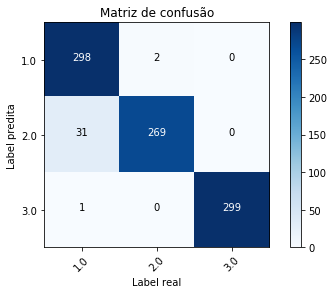

In [27]:
cnf_matrix = confusion_matrix(y_test, nbPredicts)
plot_confusion_matrix(cnf_matrix, classes=unique)

### Discriminante Quadrático Gaussiano

In [14]:
qdg = QuadraticDiscriminantAnalysis()
qdg.fit(X_train, y_train)
qdgPredicts = qdg.predict(X_test)

In [15]:
print("Acurácia: {}".format(qdg.score(X_test, y_test)))

Acurácia: 0.9633333333333334


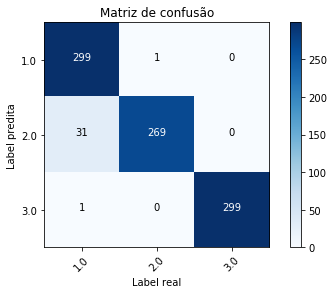

In [26]:
cnf_matrix = confusion_matrix(y_test, qdgPredicts)
plot_confusion_matrix(cnf_matrix, classes=unique)

### Plotando os dados

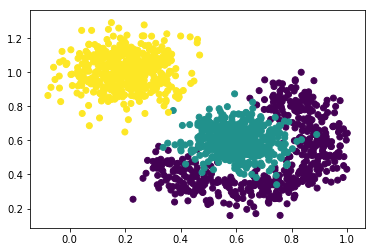

In [24]:
plt.scatter(X[:,0], X[:,1] ,c=y)

### Comentários

##### De acordo com os resultados da matriz de confusão, para ambos os modelos, percebemos que para a Classe 3, temos praticamente todos os dados classificados corretamente. Percebemos então no gráfico que a Classe 3 é linearmente separável. No entanto, para Classe 1 e 2, temos uma maior ocorrência de confusão na matriz. Assim, olhando novamente o gráfico, percebemos que ambas as classes não são linearmente separáveis. Para os modelos utilizados acima, cria-se um separador linear, portanto a separação entre as classes 1 e 2 não é totalmente adequada.